# Project: TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are going to study how the vote average is related to three attributes of a movie: budget, length and genre.
Are expensive movies better rated than cheap movies? Does the audience have a preference in length? Is there a genre that tends to lead to better rates?

In [1]:
# Import essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section, we are going to try to understand the data and its structure.

In [2]:
# Load data and print out a few lines.
df_movies = pd.read_csv("tmdb-movies.csv")
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Since we already know which variables we are going to work with, let's drop the columns we don't need:
* id - identifier, doesn't provide any information about the movie
* imdb_id - identifier, doesn't provide any information about the movie
* budget - we'll keep 'budjet_adj', the value adjusted for inflation
* revenue - we'll keep 'revenue_adj', the value adjusted for inflation
* cast - not applicable to our analysis
* homepage - not applicable to our analysis
* director - not applicable to our analysis
* tagline - not applicable to our analysis
* keywords - not applicable to our analysis
* overview - not applicable to our analysis
* production_companies - not applicable to our analysis
* release_date - we are going to keep the release year for our study 

In [3]:
df_movies.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)

Now that we've dropped the columns we won't need, we have to check the data more in detail.

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


Following, let's check those variables that don't have a specific variable type (*object*).

In [5]:
type(df_movies['original_title'][0])

str

In [6]:
type(df_movies['genres'][0])

str

To keep going, we have to convert *runtime* from *int* to *float* since the length of a movie is continuous.

In [7]:
df_movies['runtime'] = df_movies['runtime'].astype(float)

In [8]:
type(df_movies['runtime'][0])

numpy.float64

Let's take a look at other numeric data.

In [9]:
df_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

Based on the above summary, we can identify some extreme values that might indicate a lack of accurate data, so we are going to drop the corresponding records. These values are:
* Movie durations (runtime) with length 0.
* Movie budgets with value 0.
* Movie revenues with value 0. 

Let's see how many records contain such values and drop them from our dataframe.

In [10]:
# Count records with movie length 0
df_movies.query('runtime == 0').count().runtime

31

In [11]:
# Drop records with movie length 0
df_movies = df_movies[df_movies['runtime'] != 0]

In [12]:
# Check that we've done it properly
df_movies.count().runtime

10835

In [13]:
# Count records with adjusted budget 0
df_movies.query('budget_adj == 0').count().budget_adj

5668

In [14]:
# Drop records with budget_adj 0
df_movies = df_movies.query('budget_adj != 0')

In [15]:
# Check that we've done it properly
df_movies.query('budget_adj == 0').count().budget_adj

0

In [16]:
# Count records with adjusted revenue 0
df_movies.query('revenue_adj == 0').count().revenue_adj

1312

In [17]:
# Drop records with revenue_adj 0
df_movies = df_movies.query('revenue_adj != 0')

In [18]:
# Check if any row has revenue_adj 0
df_movies.query('revenue_adj == 0').count().revenue_adj

0

Finally, we have to check if there is any row duplicated.

In [19]:
# Check if there are duplicates
df_movies.duplicated().sum()

1

In [20]:
# Check the duplicate row
df_movies[df_movies.duplicated() == True]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,92.0,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [21]:
# Drop duplicates
df_movies.drop_duplicates(inplace=True)

Let's take another look at the dataset.

In [22]:
df_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [23]:
df_movies.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


One extra cleaning step before moving forward includes dealing with the variable *genres*. This column can contain multiple values, so in order to simplify the process we will assume that the first genre showing up is the main genre.

In [24]:
# Let's extract the first genre in each row
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split("|")[0])

In [25]:
# Let's check that we have single genres per row
df_movies['genres'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

In [26]:
# Quick check on the table
df_movies.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137.0,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Univariate Analysis

In this section, we are going to focus on each variable at a time. Let's start with our dependent variable, vote average.

__*Vote average*__

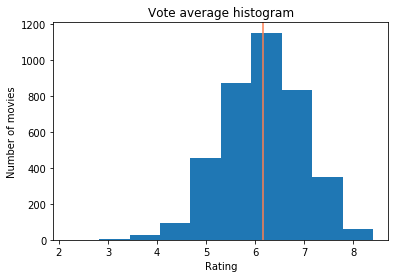

In [27]:
# What's the distribution of vote average?
plt.hist(df_movies['vote_average'])
plt.title("Vote average histogram")
plt.xlabel("Rating")
plt.ylabel("Number of movies")
plt.axvline(df_movies['vote_average'].mean(), color='coral');

In [28]:
# Average rating
df_movies['vote_average'].mean()

6.168162947586924

As we can see in the previous histogram, the vote average follows a __normal distribution__. The rating mean is 6.17.

Let's move on to study the movie length.

__*Movie length*__

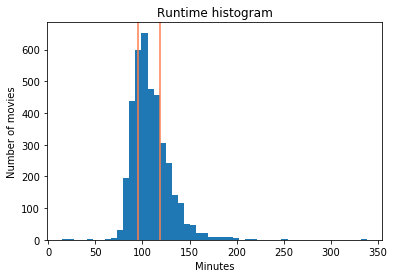

In [29]:
# What's the distribution of the variable runtime?
plt.hist(df_movies['runtime'], bins=50)
plt.title("Runtime histogram")
plt.xlabel("Minutes")
plt.ylabel("Number of movies")
plt.axvline(df_movies['runtime'].quantile(.25), color='coral')
plt.axvline(df_movies['runtime'].quantile(.75), color='coral');

In [30]:
quantile25 = df_movies['runtime'].quantile(.25)
quantile75 = df_movies['runtime'].quantile(.75)
print(quantile25, quantile75)

95.0 119.0


Most movies have durations between 95 and 1119 minutes. The distribution approximates a __normal distribution, with a slight skewness to the right__, signaling the presence of some really long movies (over 3h).

__*Genre*__

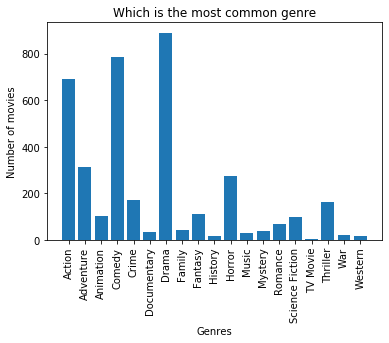

In [31]:
# What's the most common genre?
all_genres = df_movies.groupby('genres').genres.count()
plt.bar(all_genres.index, all_genres)
plt.xticks(rotation=90)
plt.title("Which is the most common genre")
plt.xlabel("Genres")
plt.ylabel("Number of movies");

The top 3 genres by volume are **drama, comedy and action**, accounting for a majority of the movies.

__*Budget*__

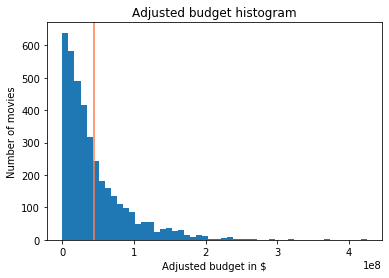

In [32]:
# What's the distribution of the adjusted budgets?
plt.hist(df_movies['budget_adj'], bins=50)
plt.title("Adjusted budget histogram")
plt.xlabel("Adjusted budget in $")
plt.ylabel("Number of movies")
plt.axvline(df_movies['budget_adj'].mean(), color='coral');

In [33]:
df_movies['budget_adj'].mean()

44239993.079943396

The adjusted budget presents a __right skewed distribution__, with a mean of $44,239,993.

__*Release year*__

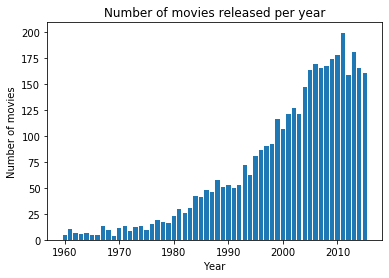

In [34]:
# Although we won't be using the variable release year, it can be interesting to see how many movies 
#  have been released per year.
years = df_movies.groupby('release_year').release_year.count()
plt.bar(years.index, years)
plt.title("Number of movies released per year")
plt.xlabel("Year")
plt.ylabel("Number of movies");

The above trend clearly shows that this dataset contains a higher volume of recent movies than old movies.

### Multivariate Analysis

In this section we will look into correlations between pairs of variables. In particular, we are going to focus on getting insights into the 3 questions posted in the intro section, ie. finding relations between vote average and three common attributes of a movie: budget, length and genre.

#### Question 1. Does movie lenght have an impact in audience ratings?

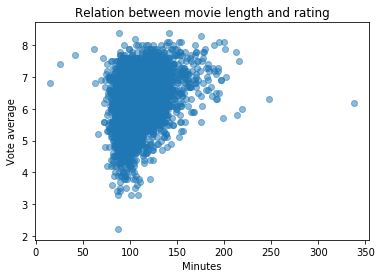

In [35]:
# Scatter plot runtime against vote_average
plt.scatter(x = df_movies['runtime'], y = df_movies['vote_average'], alpha=0.5)
plt.title("Relation between movie length and rating")
plt.xlabel('Minutes')
plt.ylabel('Vote average');

As it is a bit hard to get to conclusions by looking at the plot above, let's try to plot a 2D density graph.

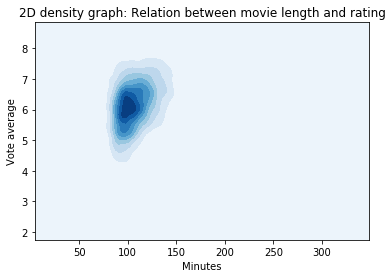

In [36]:
sns.kdeplot(df_movies['runtime'], df_movies['vote_average'], cmap="Blues", shade=True)
plt.title('2D density graph: Relation between movie length and rating')
plt.xlabel('Minutes')
plt.ylabel('Vote average');

In [37]:
# Check the correlation between both variables
np.corrcoef(x = df_movies['runtime'], y = df_movies['vote_average'])[1,0]

0.3517120988384831

Takeaways:
* Although there is some positive correlation between movie duration and rating, the relation is not very strong.
* It looks like really long movies (over 150 minutes) tend to have higher ratings.

#### Question 2. Are there genres that tend to get better ratings?

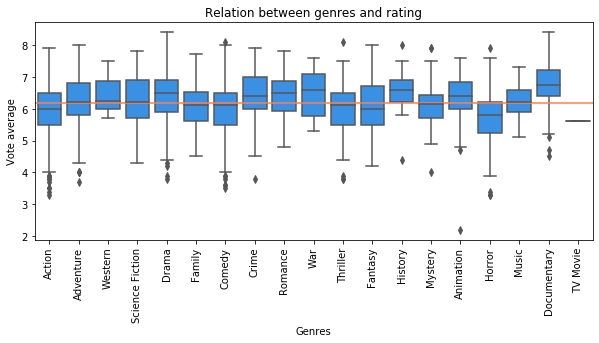

In [38]:
# Boxplots for vote average by genre
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
 
sns.boxplot(x = df_movies['genres'], y = df_movies['vote_average'], ax=ax, color='dodgerblue')

plt.xticks(rotation=90)
plt.title("Relation between genres and rating")
plt.xlabel('Genres')
plt.ylabel('Vote average')
plt.axhline(df_movies['vote_average'].mean(), color='coral');

As we can see in the picture above, there does not seem to be a very strong relation between genres and ratings. The horizontal line shows the mean of vote average for all the dataset and all the genres means are very close to the line.

#### Question 3. Are more expensive movies better rated than movies with smaller budgets?

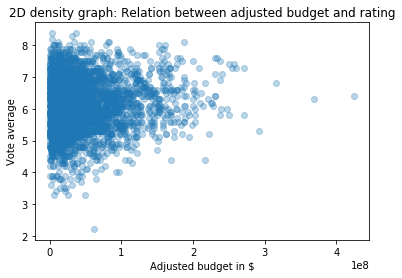

In [39]:
# Scatter plot budget against vote average
plt.scatter(x = df_movies['budget_adj'], y = df_movies['vote_average'], alpha=0.3);
plt.title('2D density graph: Relation between adjusted budget and rating')
plt.xlabel('Adjusted budget in $')
plt.ylabel('Vote average');

As it is a bit hard to get to conclusions by looking at the plot above, let's try to plot a 2D density graph.

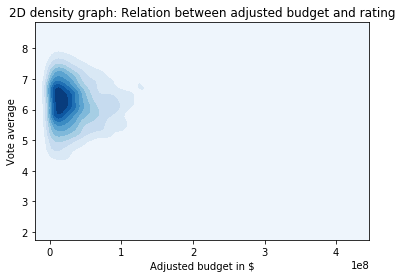

In [40]:
# 2d density graph budget against vote average
sns.kdeplot(df_movies['budget_adj'], df_movies['vote_average'], cmap="Blues", shade=True)
plt.title('2D density graph: Relation between adjusted budget and rating')
plt.xlabel('Adjusted budget in $')
plt.ylabel('Vote average');

In [41]:
# Check the correlation between both variables
np.corrcoef(x = df_movies['budget_adj'], y = df_movies['vote_average'])[1,0]

0.0368028142168781

Looking at the graphics above and the correlation coefficient it's clear that there is no linear relation between budget and rating.

<a id='conclusions'></a>
## Conclusions


Some of the challenges we've faced with the dataset are the following:
+ Decide how to deal with the values 0 in *budget*, *revenue* and *runtime*.  
    * The count number for values with 0 duration of the movie wasn't too high so it hasn't impacted the study significantly. Another approach to deal with the movies with length 0 could have been using the mean or the median of the other durations and replace the missing values.  
    * The count number for values wiht 0 budget or 0 revenue was almost half of the dataset size, so it was out of the discussion using the mean or the median to replace those values.
+ Decide how to treat the *genres* column. We made the assumption that the first genre was the main genre for the movie but we could have created rows for each genre that the movie was categorized as.

Finally, to summarize our findings, we haven't found any strong relation between movie rating and any of the variables that we've studied, runtime, genres and budget.